## Data auto preparing tools

Ou, DENG on Sep. 2022

[全面自动探索性数据分析](https://mp.weixin.qq.com/s?__biz=MzU5Mjg2OTQ1MA==&mid=2247512578&idx=1&sn=5d995dd1a08c0ce80cb4085e4f4b2b9d&chksm=fe1bd327c96c5a315104fabe3ba1d5c5dfcae9c3804a778e7eeb1942d1f1f2c40707bab7414f&scene=90&subscene=93&sessionid=1661429374&clicktime=1661440985&enterid=1661440985&ascene=56&fasttmpl_type=0&fasttmpl_fullversion=6301960-en_US-zip&fasttmpl_flag=0&realreporttime=1661440985355#rd)

Conclusion: Pandas Profilling.

* Dataprep: pip installation ERROR.
* sweetviz: need pip. works, but poor.
* D-Tale: not work.
* pandas_profiling: need pip.Looks good.
* autoviz: dependency errors.not work.
* klib: not good.
* dabl: works, but poor.

## [Altair](https://mp.weixin.qq.com/s?__biz=MzI3MzM0ODU4Mg==&mid=2247497952&idx=1&sn=fba443fd2c2a447008161ca6b42c318c&chksm=eb261a69dc51937f15f0f68bcfb7397ac30717f95380498596739252bafe49d2931a3b73331e&exptype=timeline_recommend_article_u2i_cover_coldpeople_tlfeeds&scene=169&subscene=200&sessionid=1660453056&ascene=56&fasttmpl_type=0&fasttmpl_fullversion=6283113-zh_CN-zip&fasttmpl_flag=0&realreporttime=1660458193302&clicktime=1660458193&enterid=1660458193#rd)

In [1]:
#!pip install pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport

#EDA using pandas-profiling
profile = ProfileReport(pd.read_csv('./data/economics.csv'), explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# sweetviz works, but poor.

import pandas as pd
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("./data/airpassengers.csv"))

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


0:88: execution error: ファイル“不特定のオブジェクト”が見つかりませんでした。 (-43)


## [Altair Example Gallery](https://altair-viz.github.io/gallery/index.html)

## [Altair Interaction](https://altair-viz.github.io/user_guide/interactions.html)

In [26]:
!pip install altair

     |████████████████████████████████| 812 kB 1.5 MB/s eta 0:00:01


In [28]:
!pip install vega_datasets

     |████████████████████████████████| 210 kB 2.0 MB/s eta 0:00:01


In [29]:
import altair as alt

from vega_datasets import data
cars = data.cars()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

alt.Chart(...)

In [30]:
import altair as alt
from vega_datasets import data

source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin',
    color='Origin',
    x='count(Origin)'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

In [31]:
import altair as alt
from vega_datasets import data

cars = data.cars.url
brush = alt.selection_interval()

chart = alt.Chart(cars).mark_point().encode(
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    width=250,
    height=250
).add_selection(
    brush
)

chart.encode(x='Acceleration:Q') | chart.encode(x='Miles_per_Gallon:Q')

alt.HConcatChart(...)

## [如何用Python可视化挖掘多维数据](https://mp.weixin.qq.com/s?__biz=MzI1MTE2ODg4MA==&mid=2650083132&idx=1&sn=c11752690d635a4861f6d0d29431459e&chksm=f1f6be23c6813735effdac35719b74817912966cccab4604b37148c8c52c7576b29ae5fdfe3e&scene=90&subscene=93&sessionid=1660620377&clicktime=1660620550&enterid=1660620550&ascene=56&fasttmpl_type=0&fasttmpl_fullversion=6287668-zh_CN-zip&fasttmpl_flag=0&realreporttime=1660620550033#rd)

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

#NO need "sep=';'" in original code. Error.
#white_wine = pd.read_csv('./data/winequality-white.csv', sep=';')
#red_wine = pd.read_csv('./data/winequality-red.csv', sep=';')

white_wine = pd.read_csv('./data/winequality-white.csv')
red_wine = pd.read_csv('./data/winequality-red.csv')


In [39]:
# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

In [40]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [41]:
# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [42]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [43]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 'sulphates', 
                     'alcohol', 'volatile acidity', 'quality']
rs = round(red_wine[subset_attributes].describe(),2)
ws = round(white_wine[subset_attributes].describe(),2)

pd.concat([rs, ws], axis=1, keys=['Red Wine Statistics', 'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

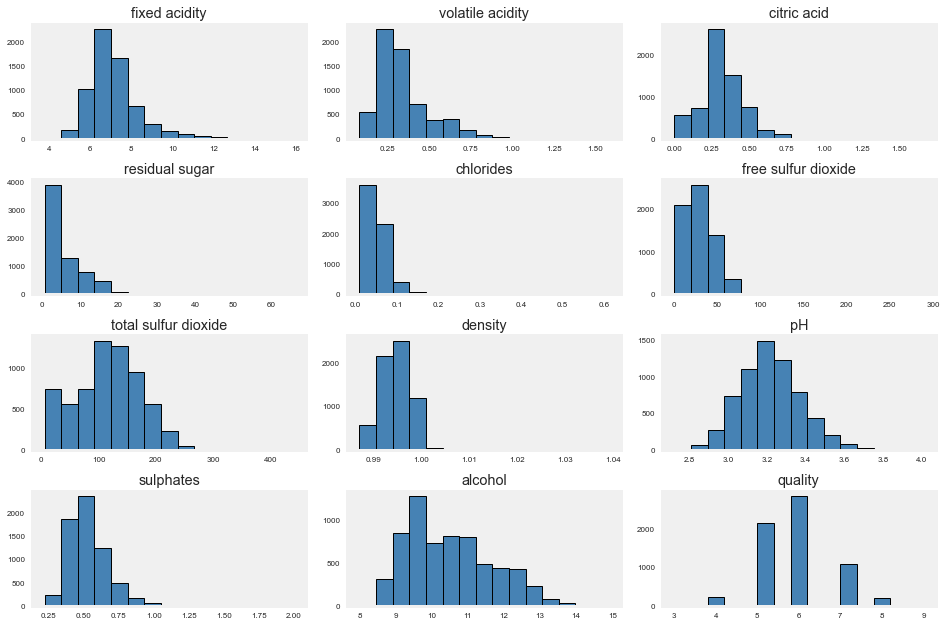

In [84]:
# Single variable analysis

wines.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.2, 2.2))  

<AxesSubplot:xlabel='Sulphates', ylabel='Frequency'>

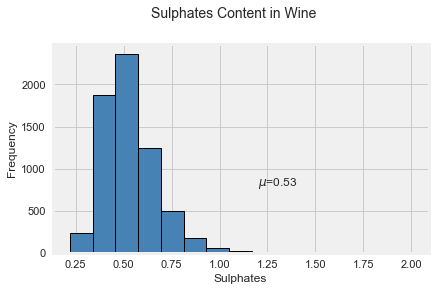

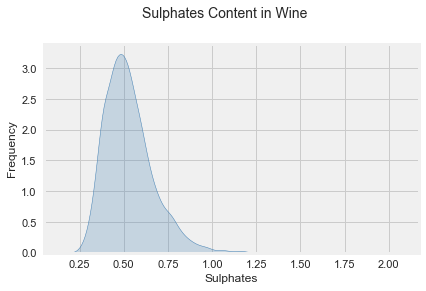

In [83]:
# Histogram
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(wines['sulphates'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(wines['sulphates'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)

# Density Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
sns.kdeplot(wines['sulphates'], ax=ax1, shade=True, color='steelblue')

从上面的图表中可以看出，葡萄酒中硫酸盐的分布存在明显的右偏（right skew）。

可视化一个离散分类型数据属性稍有不同，条形图是（bar plot）最有效的方法之一。你也可以使用饼图（pie-chart），但一般来说要尽量避免，尤其是当不同类别的数量超过 3 个时。

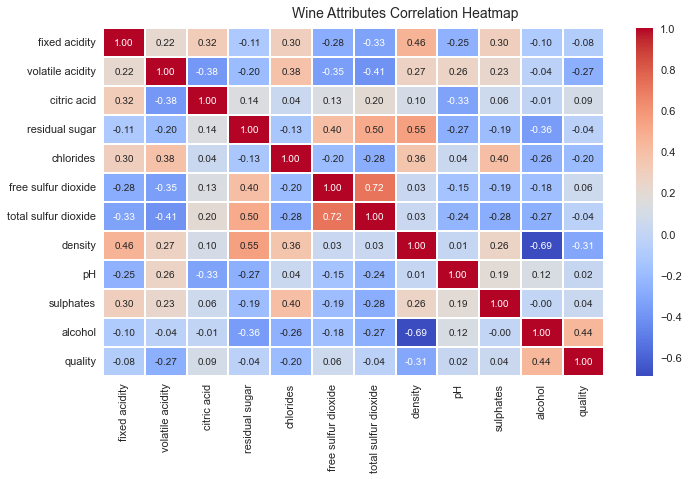

In [47]:
# Multi variable analysis
# 检查不同数据属性之间的潜在关系或相关性的最佳方法之一是利用配对相关性矩阵（pair-wise correlation matrix）并将其可视化为热力图。

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

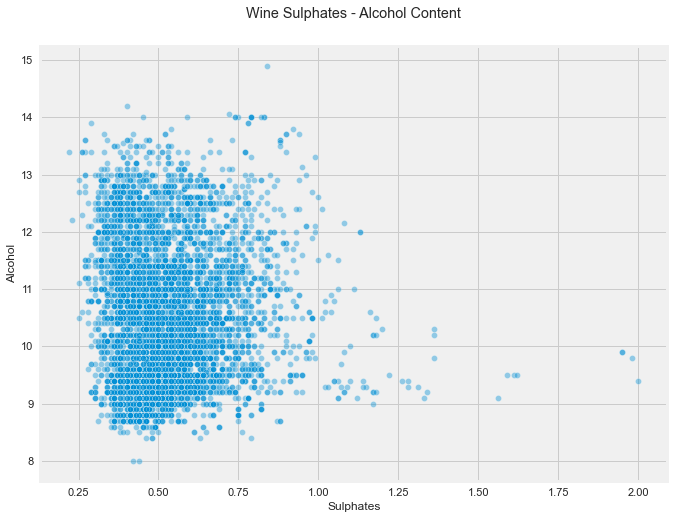

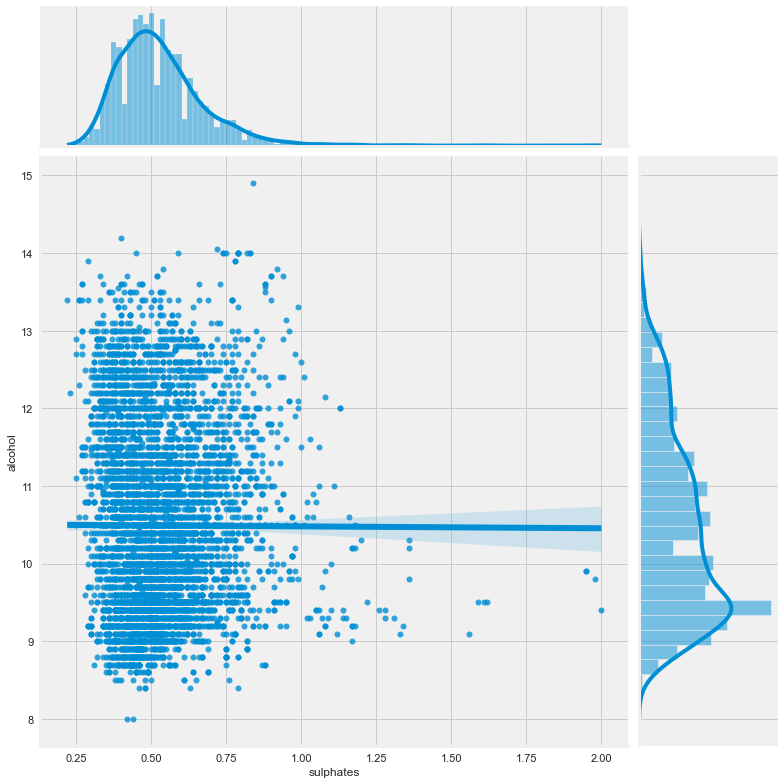

In [87]:
# 热力图中的梯度根据相关性的强度而变化，你可以很容易发现彼此之间具有强相关性的潜在属性。另一种可视化的方法是在感兴趣的属性之间使用配对散点图。

# Scatter Plot
fig = plt.figure(figsize = (10,8))

plt.scatter(wines['sulphates'], wines['alcohol'],
            alpha=0.4, edgecolors='w')

plt.xlabel('Sulphates')
plt.ylabel('Alcohol')
plt.title('Wine Sulphates - Alcohol Content',y=1.05)

# Joint Plot
jp = sns.jointplot(x='sulphates', y='alcohol', data=wines,
                   kind='reg', space=0, size=5, ratio=4)
plt.tight_layout(rect=(0, 0, 2.2, 2.2)) 

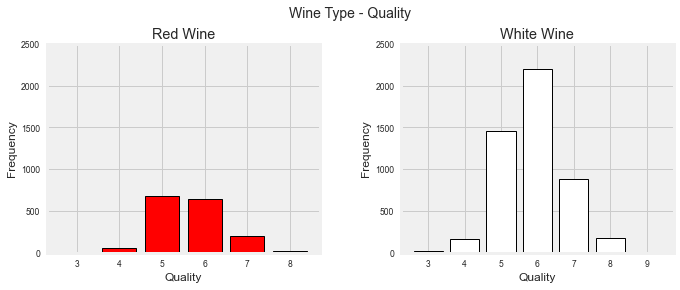

In [51]:
# Using subplots or facets along with Bar Plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
# red wine - wine quality
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

# white wine - wine quality
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

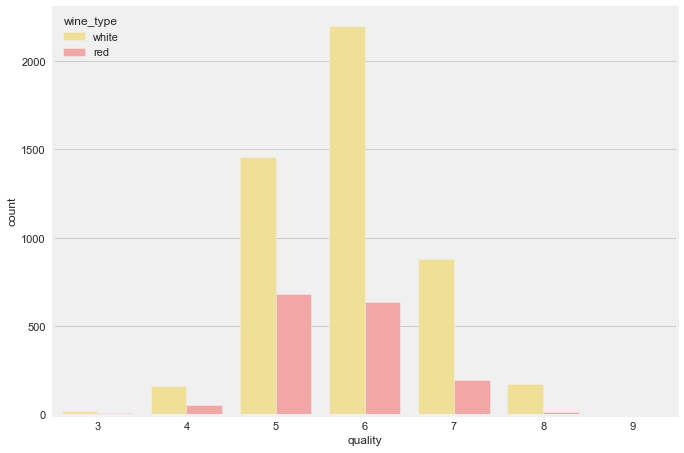

In [88]:
# 虽然这是一种可视化分类数据的好方法，但正如所见，利用 matplotlib 需要编写大量的代码。另一个好方法是在单个图中为不同的属性画堆积条形图或多个条形图。可以很容易地利用 seaborn 做到。
# Multi-bar Plot
cp = sns.countplot(x="quality", hue="wine_type", data=wines, 
                   palette={"red": "#FF9999", "white": "#FFE888"})
plt.tight_layout(rect=(0, 0, 1.6, 1.6)) 

<AxesSubplot:title={'center':'White Wine'}, xlabel='Sulphates', ylabel='Density'>

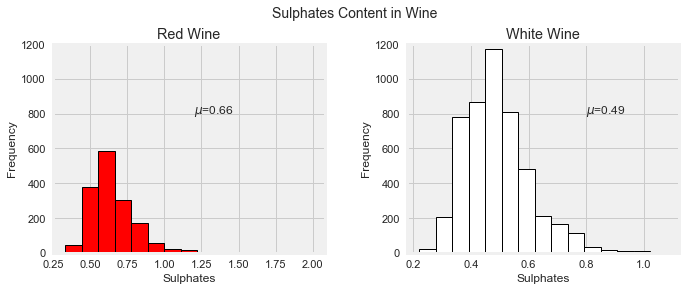

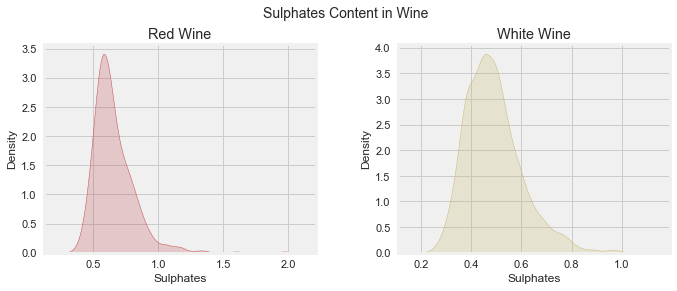

In [53]:
# 让我们看看可视化 2 维混合属性（大多数兼有数值和分类）。一种方法是使用分图\子图与直方图或核密度图。

# facets with histograms
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Frequency") 
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), 
         fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'], color='red', bins=15,
                                     edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 1200])
ax2.text(0.8, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), 
         fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'], color='white', bins=15,
                                     edgecolor='black', linewidth=1)


# facets with density plots
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Sulphates")
ax1.set_ylabel("Density") 
sns.kdeplot(red_wine['sulphates'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Sulphates")
ax2.set_ylabel("Density") 
sns.kdeplot(white_wine['sulphates'], ax=ax2, shade=True, color='y')

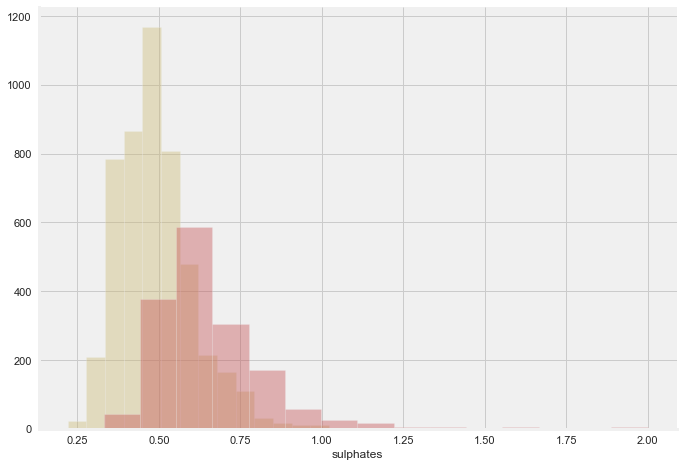

In [96]:
# 虽然这很好，但是我们再一次编写了大量代码，我们可以通过利用 seaborn 避免这些，在单个图表中画出这些图。

# Using multiple Histograms 
#fig = plt.figure(figsize = (8, 6))

title = fig.suptitle("Sulphates Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Sulphates")
ax.set_ylabel("Frequency") 

g = sns.FacetGrid(wines, hue='wine_type', palette={"red": "r", "white": "y"})
g.map(sns.distplot, 'sulphates', kde=False, bins=15, ax=ax)
#ax.legend(title='Wine Type')
plt.tight_layout(rect=(0, 0, 3.2, 2.2)) 

#plt.close(2)

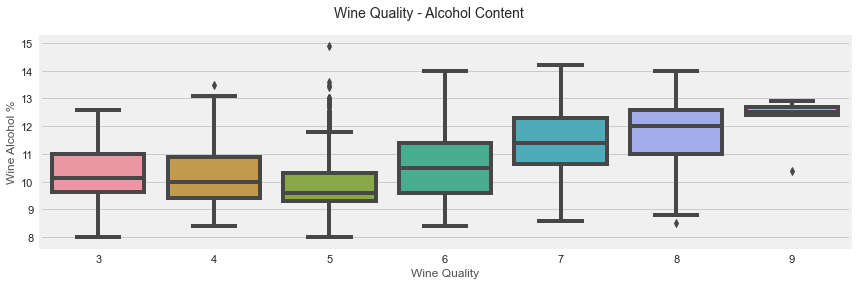

In [102]:
# 可以看到上面生成的图形清晰简洁，我们可以轻松地比较各种分布。除此之外，箱线图（box plot）是根据分类属性中的不同数值有效描述数值数据组的另一种方法。箱线图是了解数据中四分位数值以及潜在异常值的好方法。

# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
plt.tight_layout(rect=(0, 0, 1.0, 1.0)) 

Text(0, 0.5, 'Wine Sulphates')

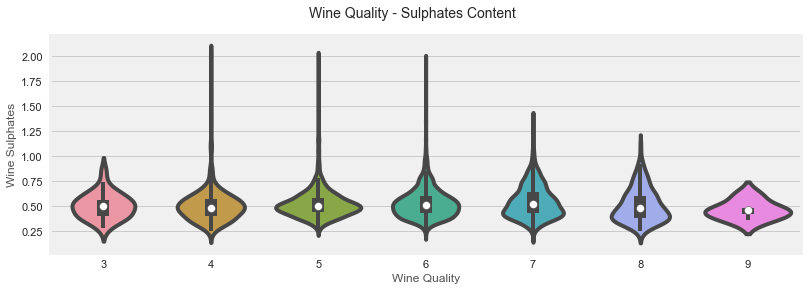

In [58]:
# 另一个类似的可视化是小提琴图，这是使用核密度图显示分组数值数据的另一种有效方法（描绘了数据在不同值下的概率密度）。

# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Wine Quality - Sulphates Content', fontsize=14)

sns.violinplot(x="quality", y="sulphates", data=wines,  ax=ax)
ax.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax.set_ylabel("Wine Sulphates",size = 12,alpha=0.8)

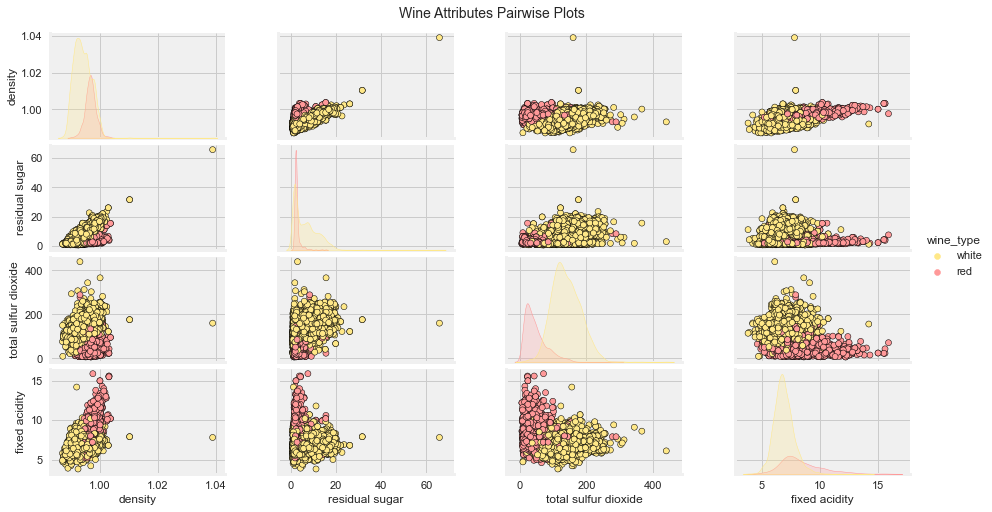

In [59]:
# Furthermore, 3D

# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

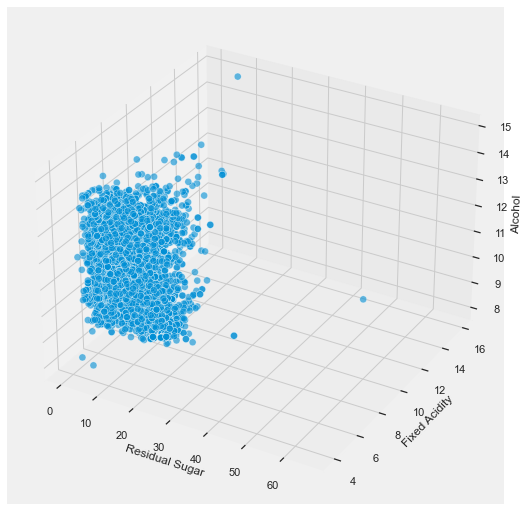

In [104]:
# 上图可以查看相关性和模式，也可以比较葡萄酒组。就像我们可以清楚地看到白葡萄酒的总二氧化硫和残糖比红葡萄酒高。
# 让我们来看看可视化 3 个连续型数值属性的策略。一种方法是将 2 个维度表征为常规长度（x 轴）和宽度（y 轴）并且将第 3 维表征为深度（z 轴）的概念。

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

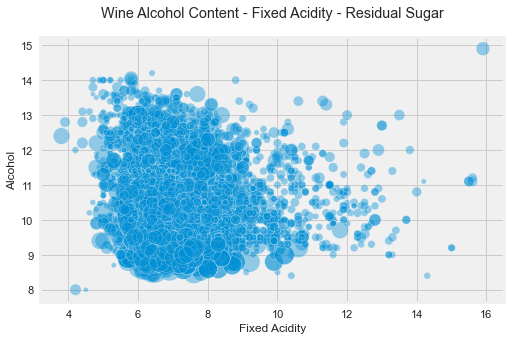

In [105]:
# 我们还可以利用常规的 2 维坐标轴，并将尺寸大小的概念作为第 3 维（本质上是气泡图），其中点的尺寸大小表征第 3 维的数量。

# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

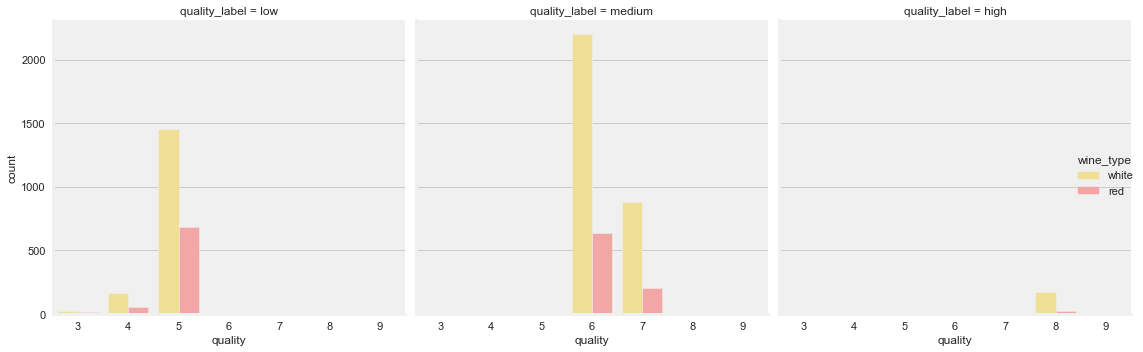

In [106]:
# 因此，你可以看到上面的图表不是一个传统的散点图，而是点（气泡）大小基于不同残糖量的的气泡图。当然，并不总像这种情况可以发现数据明确的模式，我们看到其它两个维度的大小也不同。
# 为了可视化3个离散型分类属性，我们可以使用常规的条形图，可以利用色调的概念以及分面或子图表征额外的第3个维度。seaborn框架帮助我们最大程度地减少代码，并高效地绘图。

# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})
plt.tight_layout(rect=(0, 0, 1.0, 1.0)) 

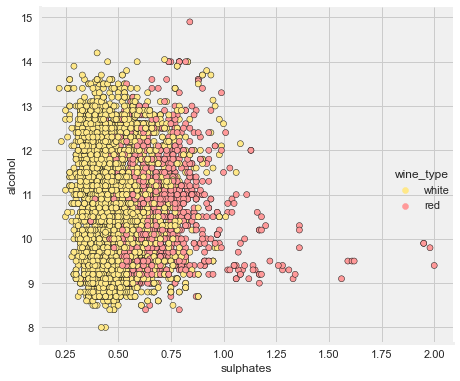

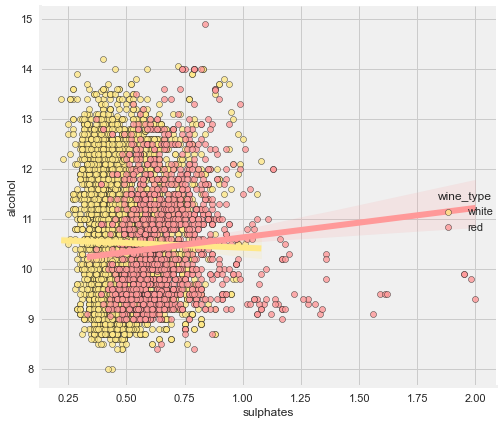

In [111]:
# 上面的图表清楚地显示了与每个维度相关的频率，可以看到，通过图表能够容易有效地理解相关内容。
# 考虑到可视化 3 维混合属性，我们可以使用色调的概念来将其中一个分类属性可视化，同时使用传统的如散点图来可视化数值属性的 2 个维度。

# Visualizing 3-D mix data using scatter plots
# leveraging the concepts of hue for categorical dimension
jp = sns.pairplot(wines, x_vars=["sulphates"], y_vars=["alcohol"], size=4.5,
                  hue="wine_type", palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="k", linewidth=0.5))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='sulphates', y='alcohol', hue='wine_type', 
                palette={"red": "#FF9999", "white": "#FFE888"},
                data=wines, fit_reg=True, legend=True,
                scatter_kws=dict(edgecolor="k", linewidth=0.5)) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 


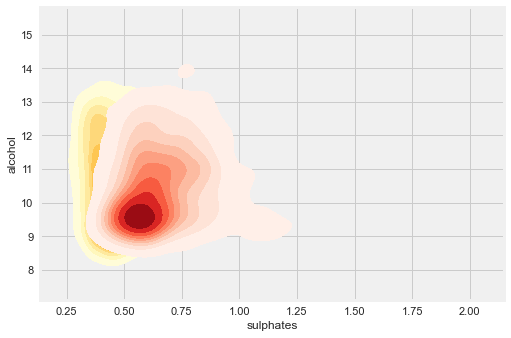

In [112]:
# 因此，色调作为类别或群体的良好区分，虽然如上图观察没有相关性或相关性非常弱，但从这些图中我们仍可以理解，与白葡萄酒相比，红葡萄酒的硫酸盐含量较高。你也可以使用核密度图代替散点图来理解 3 维数据。

# Visualizing 3-D mix data using kernel density plots
# leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'],
                  cmap="Reds", shade=True, shade_lowest=False) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

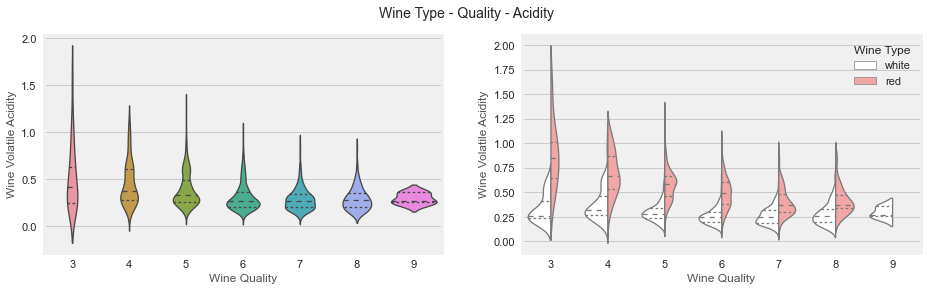

In [65]:
# 与预期一致且相当明显，红葡萄酒样品比白葡萄酒具有更高的硫酸盐含量。你还可以根据色调强度查看密度浓度。
# 如果我们正在处理有多个分类属性的 3 维数据，我们可以利用色调和其中一个常规轴进行可视化，并使用如箱线图或小提琴图来可视化不同的数据组。

# Visualizing 3-D mix data using violin plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Acidity', fontsize=14)

sns.violinplot(x="quality", y="volatile acidity",
               data=wines, inner="quart", linewidth=1.3,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)

sns.violinplot(x="quality", y="volatile acidity", hue="wine_type", 
               data=wines, split=True, inner="quart", linewidth=1.3,
               palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Volatile Acidity",size = 12,alpha=0.8)
l = plt.legend(loc='upper right', title='Wine Type')  

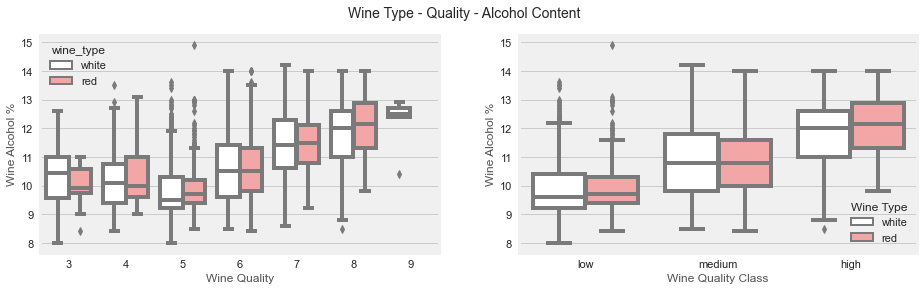

In [66]:
#在上图中，我们可以看到，在右边的 3 维可视化图中，我们用 x 轴表示葡萄酒质量，wine_type 用色调表征。
#我们可以清楚地看到一些有趣的见解，例如与白葡萄酒相比红葡萄酒的挥发性酸度更高。
#也可以考虑使用箱线图来代表具有多个分类变量的混合属性。

# Visualizing 3-D mix data using box plots
# leveraging the concepts of hue and axes for > 1 categorical dimensions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x="quality", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="alcohol", hue="wine_type",
               data=wines, palette={"red": "#FF9999", "white": "white"}, ax=ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Wine Type')          

我们可以看到，对于质量和 quality_label 属性，葡萄酒酒精含量都会随着质量的提高而增加。另外红葡萄酒与相同品质类别的白葡萄酒相比具有更高的酒精含量（中位数）。然而，如果检查质量等级，我们可以看到，对于较低等级的葡萄酒（3 和 4），白葡萄酒酒精含量（中位数）大于红葡萄酒样品。否则，红葡萄酒与白葡萄酒相比似乎酒精含量（中位数）略高。

## 4D

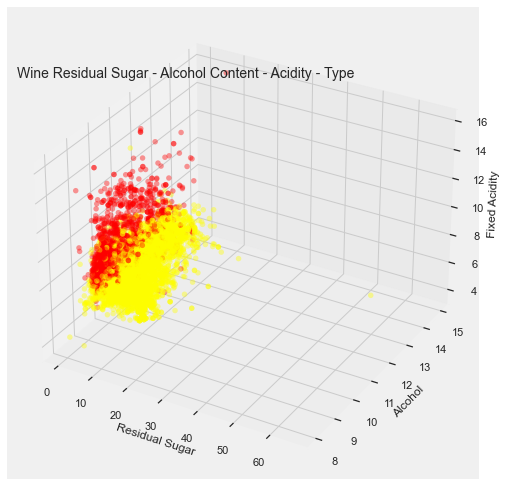

In [113]:
# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and depth
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Type', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color in zip(data_points, colors):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=30)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')      
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

wine_type 属性由上图中的色调表征得相当明显。此外，由于图的复杂性，解释这些可视化开始变得困难，但我们仍然可以看出，例如红葡萄酒的固定酸度更高，白葡萄酒的残糖更高。当然，如果酒精和固定酸度之间有某种联系，我们可能会看到一个逐渐增加或减少的数据点趋势。

另一个策略是使用二维图，但利用色调和数据点大小作为数据维度。通常情况下，这将类似于气泡图等我们先前可视化的图表。

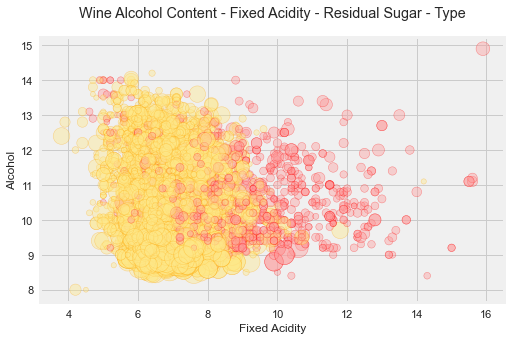

In [114]:
# Visualizing 4-D mix data using bubble plots
# leveraging the concepts of hue and size
size = wines['residual sugar']*25
fill_colors = ['#FF9999' if wt=='red' else '#FFE888' for wt in list(wines['wine_type'])]
edge_colors = ['red' if wt=='red' else 'orange' for wt in list(wines['wine_type'])]

plt.scatter(wines['fixed acidity'], wines['alcohol'], s=size, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar - Type',y=1.05)
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

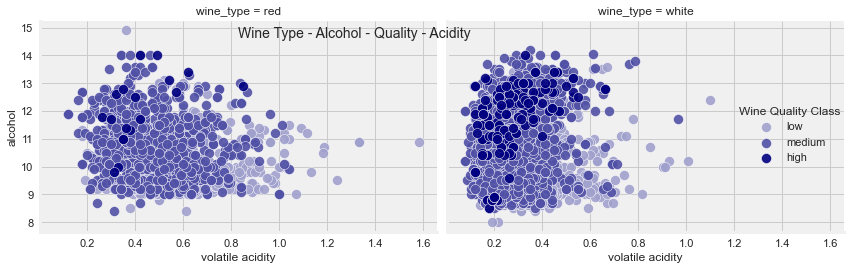

In [115]:
#我们用色调代表 wine_type 和数据点大小代表残糖。我们确实看到了与前面图表中观察到的相似模式，白葡萄酒气泡尺寸更大表征了白葡萄酒的残糖值更高。
#如果我们有多于两个分类属性表征，可在常规的散点图描述数值数据的基础上利用色调和分面来描述这些属性。我们来看几个实例。

#这种可视化的有效性使得我们可以轻松识别多种模式。白葡萄酒的挥发酸度较低，同时高品质葡萄酒具有较低的酸度。
#也基于白葡萄酒样本，高品质的葡萄酒有更高的酒精含量和低品质的葡萄酒有最低的酒精含量！
#让我们借助一个类似实例，并建立一个 4 维数据的可视化。

# Visualizing 4-D mix data using scatter plots
# leveraging the concepts of hue and facets for > 1 categorical attributes
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label', 
                  col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
                  aspect=1.2, size=3.5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

Text(0.5, 0, 'Fixed Acidity')

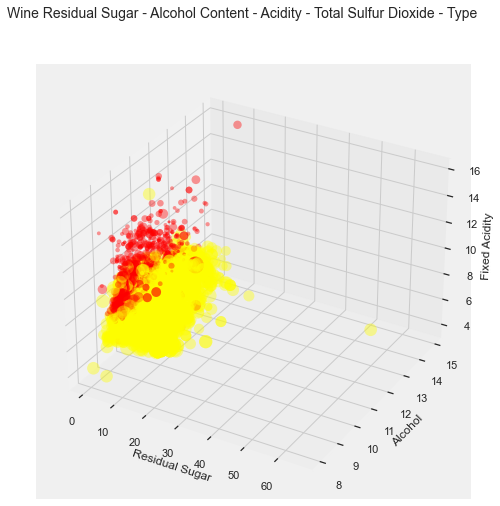

In [118]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')


Text(0.5, 0, 'Fixed Acidity')

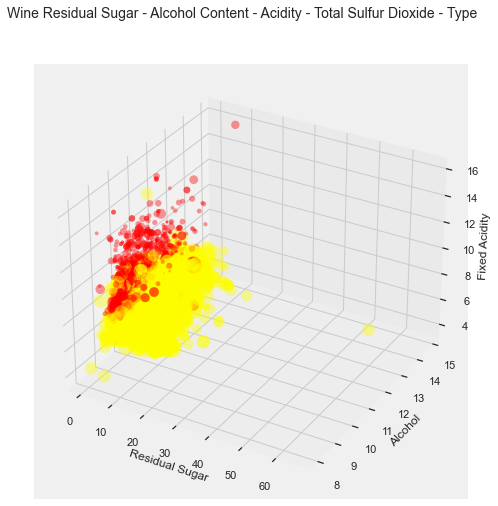

In [119]:
# Visualizing 5-D mix data using bubble charts
# leveraging the concepts of hue, size and depth
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type', fontsize=14)

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]

for data, color, size in zip(data_points, colors, ss):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

Text(0.5, 0, 'Fixed Acidity')

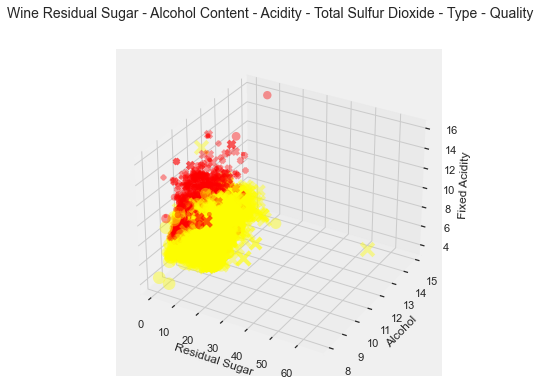

In [74]:
# Visualizing 6-D mix data using scatter charts
# leveraging the concepts of hue, size, depth and shape
fig = plt.figure(figsize=(8, 6))
t = fig.suptitle('Wine Residual Sugar - Alcohol Content - Acidity - Total Sulfur Dioxide - Type - Quality', fontsize=14)
ax = fig.add_subplot(111, projection='3d')

xs = list(wines['residual sugar'])
ys = list(wines['alcohol'])
zs = list(wines['fixed acidity'])
data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]

ss = list(wines['total sulfur dioxide'])
colors = ['red' if wt == 'red' else 'yellow' for wt in list(wines['wine_type'])]
markers = [',' if q == 'high' else 'x' if q == 'medium' else 'o' for q in list(wines['quality_label'])]

for data, color, size, mark in zip(data_points, colors, ss, markers):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=size, marker=mark)

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Fixed Acidity')

In [ ]:
# CODE STARNGE!!

# Visualizing 6-D mix data using scatter charts 
# leveraging the concepts of hue, facets and size 
g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4) 
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.5,  
edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2) 
fig = g.fig  
fig.set_size_inches(18, 8) 
fig.subplots_adjust(top=0.85, wspace=0.3) 
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14) 
l = g.add_legend(title='Wine Quality Class')

这可是在一张图上画出 6 维数据！我们用形状表征葡萄酒的质量标注，优质（用方块标记），一般（用 x 标记），差（用圆标记）：用色调表示红酒的类型，由深度和数据点大小确定的酸度表征总二氧化硫含量。

这个解释起来可能有点费劲，但是在试图理解多维数据的隐藏信息时，最好结合一些绘图组件将其可视化。

结合形状和 y 轴的表现，我们知道高中档的葡萄酒的酒精含量比低质葡萄酒更高。
结合色调和大小的表现，我们知道白葡萄酒的总二氧化硫含量比红葡萄酒更高。
结合深度和色调的表现，我们知道白葡萄酒的酸度比红葡萄酒更低。
结合色调和 x 轴的表现，我们知道红葡萄酒的残糖比白葡萄酒更低。
结合色调和形状的表现，似乎白葡萄酒的高品质产量高于红葡萄酒。（可能是由于白葡萄酒的样本量较大）
我们也可以用分面属性来代替深度构建 6 维数据可视化效果。

ValueError: s must be a scalar, or float array-like with the same size as x and y

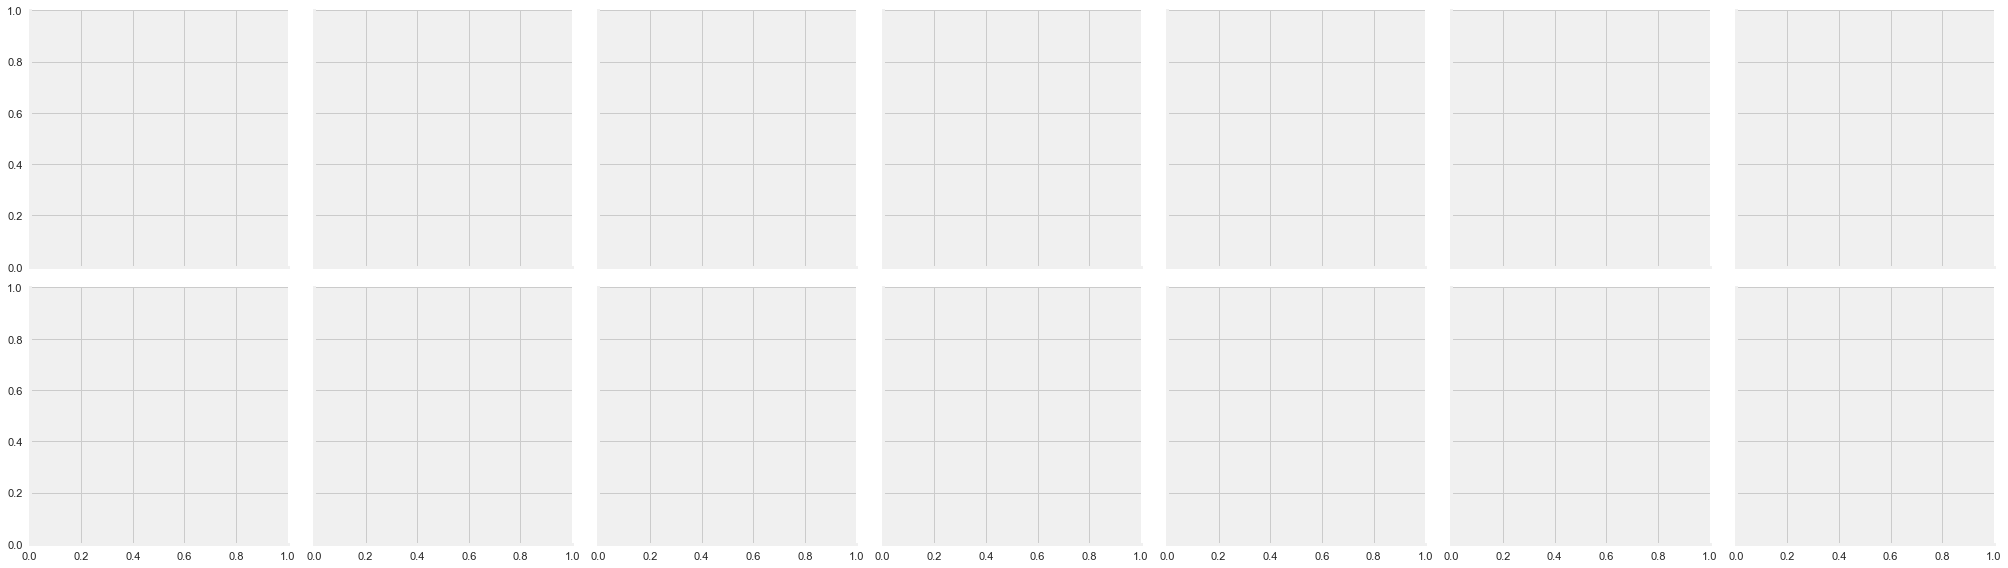

In [120]:
# Visualizing 6-D mix data using scatter charts 
# leveraging the concepts of hue, facets and size 

g = sns.FacetGrid(wines, row='wine_type', col="quality", hue='quality_label', size=4) 
g.map(plt.scatter, "residual sugar", "alcohol", alpha=0.5,  
edgecolor='k', linewidth=0.5, s=wines['total sulfur dioxide']*2) 
fig = g.fig  
fig.set_size_inches(18, 8) 
fig.subplots_adjust(top=0.85, wspace=0.3) 
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Alcohol - Quality Class - Quality Rating', fontsize=14) 
l = g.add_legend(title='Wine Quality Class')